#Exploratory Data Analysis

##1. Import libraries and load dataset

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('DatasetLibros.csv')
df

,libro,autor,editorial,anio_publicacion,num_paginas,formato,categoria,rating,popularidad_libro
0,Aplicaciones modernas de Ambiental,Esteban Aguilar,Alfaomega,2001,294,Físico,Ambiental,3.01,2
1,Sistematizacion de Ciencias de la salud,Carlos Pérez,Cambridge Press,2022,592,Digital,Ciencias de la salud,1.25,1
2,Conocimientos de Ambiental,Nuria Alvarez,Springer,2001,759,Físico,Ambiental,4.14,6
3,Sistematizacion de Filosofía,Sergio Gomez,Alfaomega,2015,712,Físico,Filosofía,1.37,10
4,Pilares de la ingeniería Mecanica,Carlos Javier,McGraw-Hill,2012,328,Físico,Mecanica,1.24,1
...,...,...,...,...,...,...,...,...,...
2631,Procesos de la ingeniería Artes,Ricardo Gualán,Springer,2014,740,Físico,Artes,4.84,5
2632,Pilares de la ingeniería Industrial,Nuria Alvarez,McGraw-Hill,2004,546,Físico,Industrial,1.47,9
2633,Principios de Mecanica,Alfons Gonzalez,Alfaomega,2011,676,Digital,Mecanica,1.10,5
2634,Fundamentos de Derecho,María Torres,McGraw-Hill,2015,510,Físico,Derecho,1.96,9


-------------
##2. Data cleaning

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2636 entries, 0 to 2635
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   libro              2636 non-null   object 
 1   autor              2636 non-null   object 
 2   editorial          2636 non-null   object 
 3   anio_publicacion   2636 non-null   int64  
 4   num_paginas        2636 non-null   int64  
 5   formato            2636 non-null   object 
 6   categoria          2636 non-null   object 
 7   rating             2636 non-null   float64
 8   popularidad_libro  2636 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 185.5+ KB


In [17]:
df.isnull().sum()

,0
libro,0
autor,0
editorial,0
anio_publicacion,0
num_paginas,0
formato,0
categoria,0
rating,0
popularidad_libro,0


In [18]:
df[df.duplicated()].sum()

,0
libro,0
autor,0
editorial,0
anio_publicacion,0
num_paginas,0
formato,0
categoria,0
rating,0.0
popularidad_libro,0


------------------
##3. Univariate Analysis

Numerical variables

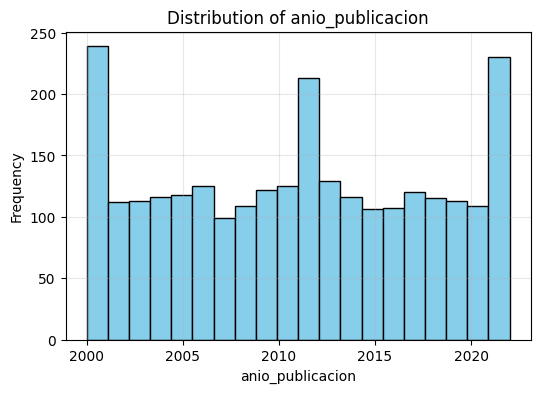

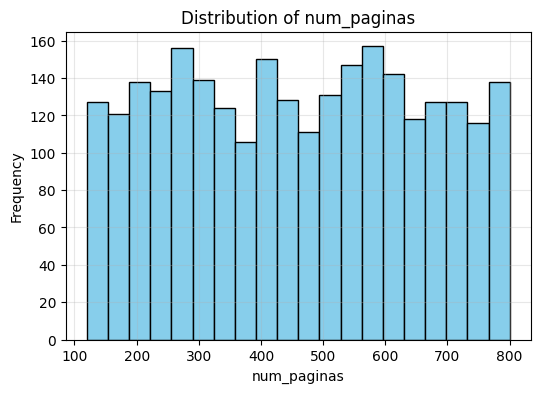

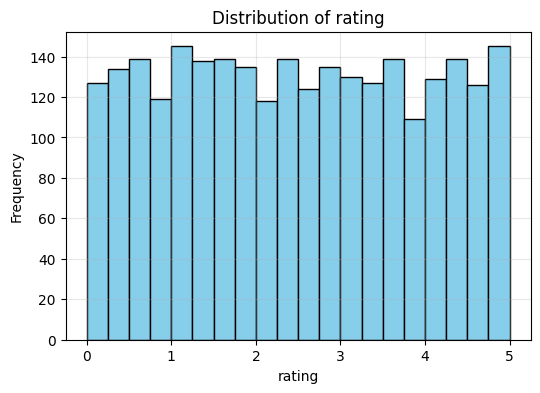

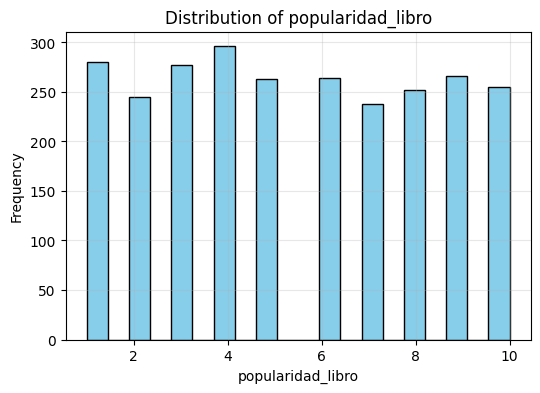

In [20]:
num_cols = ['anio_publicacion', 'num_paginas', 'rating', 'popularidad_libro']
for col in num_cols:
    plt.figure(figsize=(6,4))
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(alpha=0.3)
    plt.show()

Categorical variables

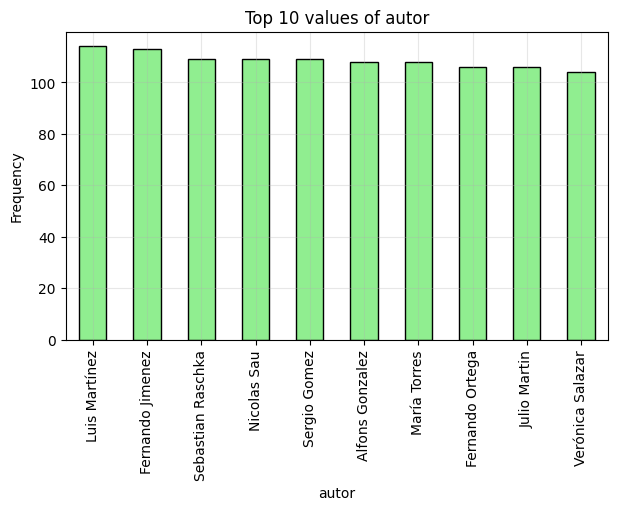

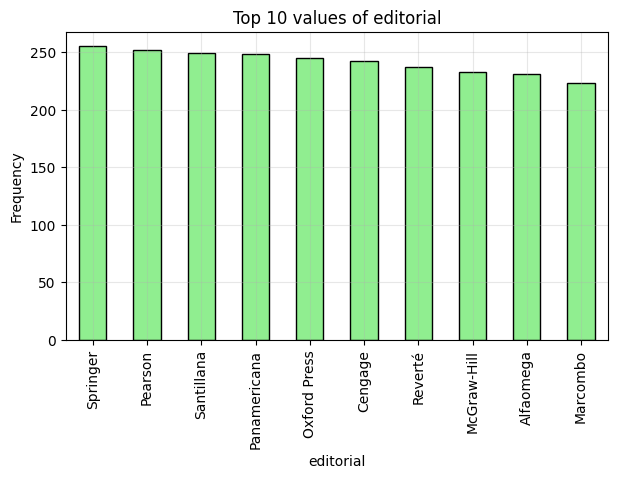

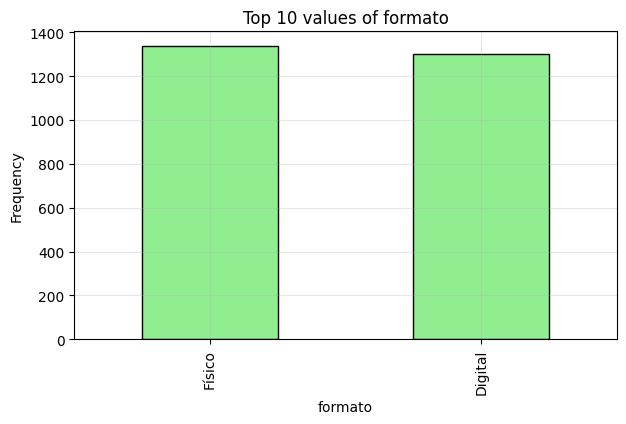

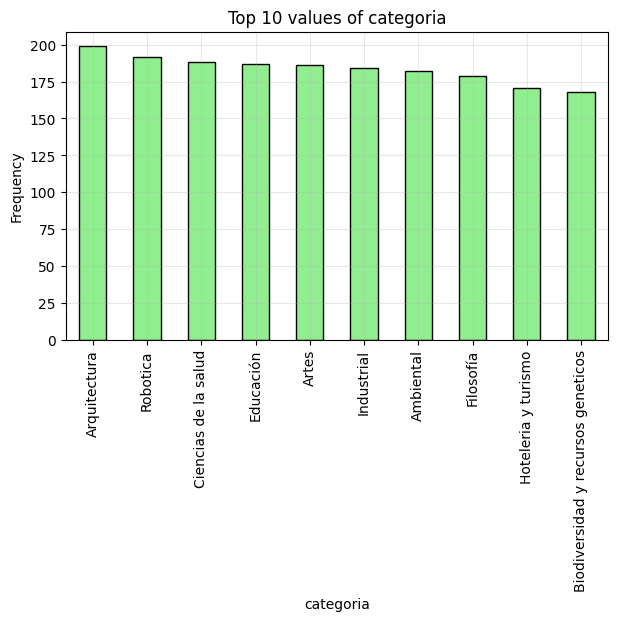

In [23]:
cat_cols = ['autor', 'editorial', 'formato', 'categoria']
for col in cat_cols:
    plt.figure(figsize=(7,4))
    df[col].value_counts().head(10).plot(kind="bar", color="lightgreen", edgecolor="black")
    plt.title(f"Top 10 values of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(alpha=0.3)
    plt.show()

-------------
##4. Bivariate Analysis

Correlation between numerical variables


Correlation Matrix:
                    anio_publicacion  num_paginas    rating  popularidad_libro
anio_publicacion           1.000000    -0.023825  0.021001           0.005303
num_paginas               -0.023825     1.000000  0.005712           0.009497
rating                     0.021001     0.005712  1.000000          -0.021239
popularidad_libro          0.005303     0.009497 -0.021239           1.000000


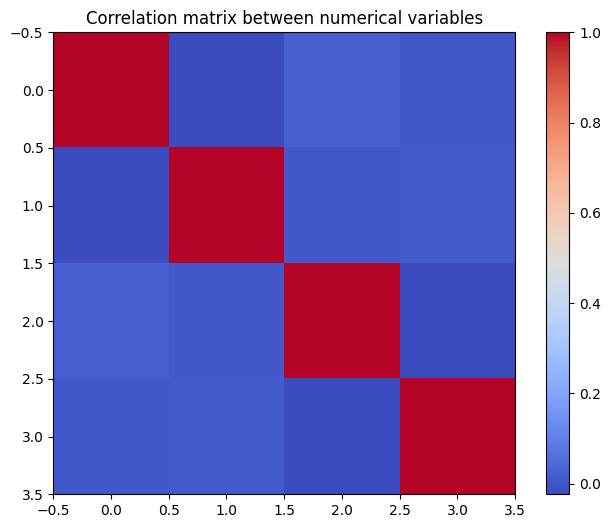

In [26]:
corr = df[num_cols].corr()
print("\nCorrelation Matrix:\n", corr)
plt.figure(figsize=(8,6))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.title("Correlation matrix between numerical variables")
plt.colorbar()
plt.show()

Relationship between number of pages and rating

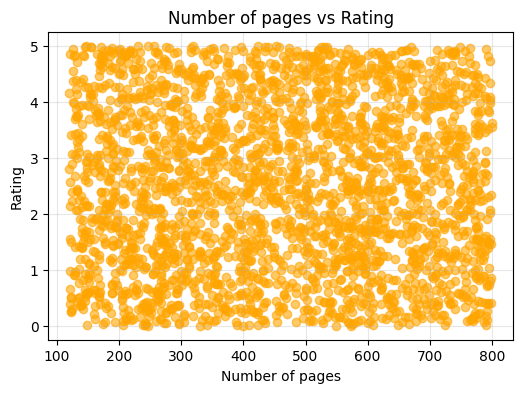

In [28]:
plt.figure(figsize=(6,4))
plt.scatter(df["num_paginas"], df["rating"], alpha=0.6, color='orange')
plt.title("Number of pages vs Rating")
plt.xlabel("Number of pages")
plt.ylabel("Rating")
plt.grid(alpha=0.3)
plt.show()

Popularity according to format

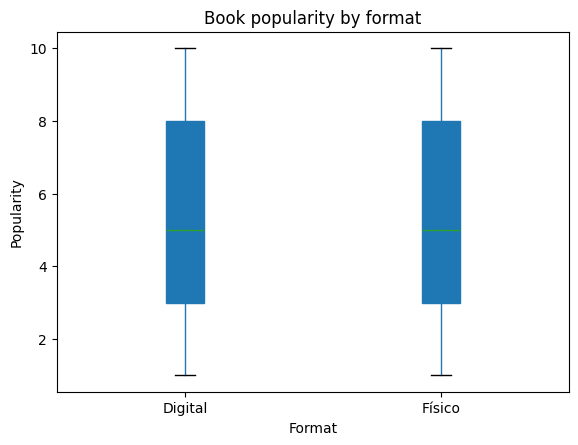

In [29]:
df.boxplot(column="popularidad_libro", by="formato", grid=False, patch_artist=True)
plt.title("Book popularity by format")
plt.suptitle("")
plt.xlabel("Format")
plt.ylabel("Popularity")
plt.show()

-------------
##5. Multivariate Analysis

Visual multivariate correlations


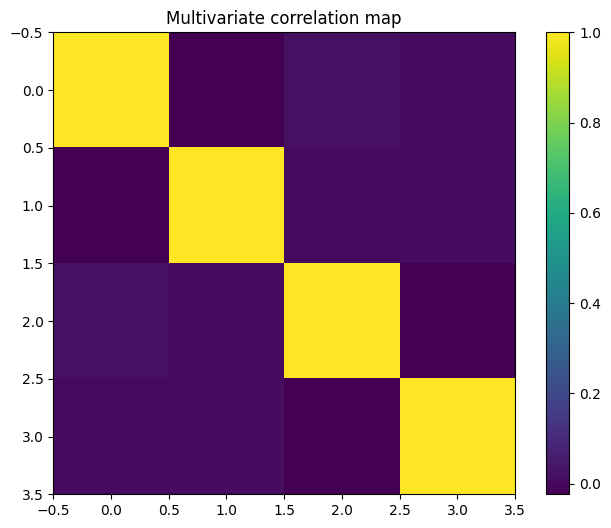

In [30]:
plt.figure(figsize=(8,6))
plt.imshow(corr, cmap="viridis", interpolation="nearest")
plt.title("Multivariate correlation map")
plt.colorbar()
plt.show()


Relationship between three variables (popularidad, rating, num_paginas)

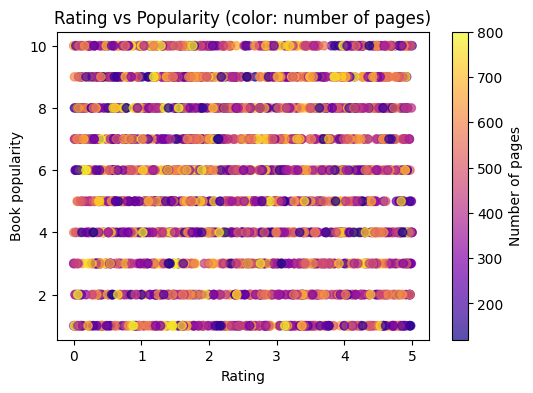

In [32]:
plt.figure(figsize=(6,4))
scatter = plt.scatter(df["rating"], df["popularidad_libro"], c=df["num_paginas"], cmap="plasma", alpha=0.7)
plt.title("Rating vs Popularity (color: number of pages)")
plt.xlabel("Rating")
plt.ylabel("Book popularity")
plt.colorbar(scatter, label="Number of pages")
plt.show()